# Iteracyjne metody rozwiązywania równań liniowych

## Zadanie 1.

Zaimplementować metodę Jacobiego i przetestować jej działanie na paru układach równań. Porównać z metodą eliminacji Gaussa użytą do tych samych równań.

In [1]:
import numpy as np

def jacobi_solve(A: np.matrix, b: np.matrix, n: int = 50) -> np.matrix:                                                                                                                                        
    x = np.zeros((A.shape[0], 1))

    D = np.diag(A)
    R = A - np.diagflat(D)
    D = D.reshape((A.shape[0], 1))

    for i in range(n):
        x = (b - np.dot(R, x)) / D
    return x

In [2]:
A = np.matrix([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

b = np.matrix([6., 25., -11., 15.]).transpose()

np.allclose(jacobi_solve(A, b), np.linalg.solve(A, b))

True

## Zadanie 2.

Zaimplementować metodę Gaussa-Seidela i przetestować na tych samych układach równań, co metodę Jacobiego.

In [3]:
def gauss_seidel_solve(A: np.matrix, b: np.matrix, n: int = 50) -> np.matrix:
    x = np.zeros((A.shape[0], 1))
        
    L = np.tril(A)
    U = A - L
    for i in range(n):
        x = np.dot(np.linalg.inv(L), b - np.dot(U, x))
    return x

In [4]:
A = np.matrix([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

b = np.matrix([6., 25., -11., 15.]).transpose()

np.allclose(gauss_seidel_solve(A, b), np.linalg.solve(A, b))

True

## Zadanie 3.

Zaimplementować metodę SOR i przetestować na tych samych układach.

In [5]:
def sor_solve(A: np.matrix, b: np.matrix, n: int = 50, factor: int = 1) -> np.matrix:
    x = np.zeros((A.shape[0], 1))
    
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    D = np.diagflat(np.diagonal(A))
    
    for i in range(n):
        x = np.dot(np.linalg.inv(D + factor * L), factor * b - np.dot(factor * U + (factor - 1) * D, x))
    return x

In [6]:
A = np.matrix([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

b = np.matrix([6., 25., -11., 15.]).transpose()

np.allclose(sor_solve(A, b), np.linalg.solve(A, b))

True

## Zadanie 4.

Dla powyższych metod porównać (na wykresie) tempo zbiegania do rozwiązania.

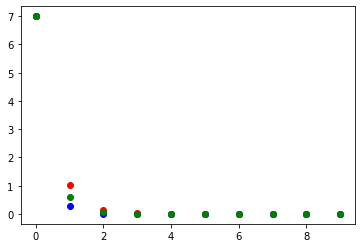

In [8]:
import matplotlib.pyplot as plt

A = np.matrix([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

b = np.matrix([6., 25., -11., 15.]).transpose()

def element_distance(a: np.matrix, b: np.matrix) -> int:
    rv = 0
    for i in range(a.shape[0]):
        rv += (a.item((i, 0)) - b.item((i, 0))) ** 2
    return rv

x = np.linalg.solve(A, b)
i = list(range(10))

j = [element_distance(x, jacobi_solve(A, b, t)) for t in i]
gs = [element_distance(x, gauss_seidel_solve(A, b, t)) for t in i]
sor = [element_distance(x, sor_solve(A, b, t, 0.7)) for t in i]

plt.plot(i, j, 'ro')
plt.plot(i, gs, 'bo')
plt.plot(i, sor, 'go')

plt.show()